In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
Train = pd.read_csv(r'kc_house_train_data.csv.zip',dtype=dtype_dict)
Test = pd.read_csv(r'kc_house_test_data.csv.zip',dtype=dtype_dict)
Valid = pd.read_csv(r'kc_house_valid_data.csv.zip',dtype=dtype_dict)

In [4]:
Train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
1,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
2,9212900260,20140527T000000,468000.0,2.0,1.00,1160.0,6000,1,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330.0,6000.0
3,0114101516,20140528T000000,310000.0,3.0,1.00,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
4,6054650070,20141007T000000,400000.0,3.0,1.75,1370.0,9680,1,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370.0,10208.0


In [5]:
def polynomial_pandas(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_pandas = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_pandas['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_pandas[name] = feature**power
    return (poly_pandas)

In [5]:
sales = pd.read_csv('kc_house_data.csv.zip', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [6]:
degree = 1
feature = sales['sqft_living']
poly1_data = polynomial_pandas(feature,degree)

In [7]:
poly1_data['price'] = sales['price'] # price is our output

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [9]:
lin_reg_model = lin_reg.fit(X=poly1_data['power_1'].values.reshape(-1,1),y=poly1_data['price'])

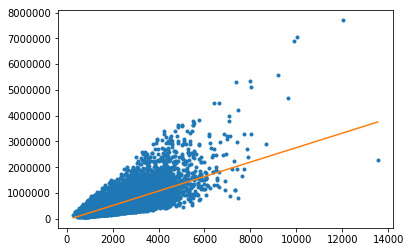

In [11]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',poly1_data['power_1'], lin_reg_model.predict(poly1_data['power_1'].values.reshape(-1,1)),'-')

In [12]:
degree = 2
poly2_data = polynomial_pandas(feature,degree)
poly2_data['price'] = sales['price']

In [13]:
lin_reg_model2 = lin_reg.fit(X=poly2_data[['power_1','power_2']],y=poly2_data['price'])

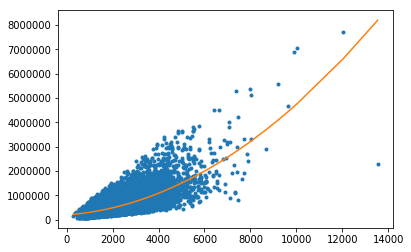

In [14]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',poly2_data['power_1'], lin_reg_model2.predict(poly2_data[['power_1','power_2']]),'-')

In [15]:
degree = 3
poly3_data = polynomial_pandas(feature,degree)
poly3_data['price'] = sales['price']

In [16]:
lin_reg_model3 = lin_reg.fit(X=poly3_data[['power_1','power_2','power_3']],y=poly3_data['price'])

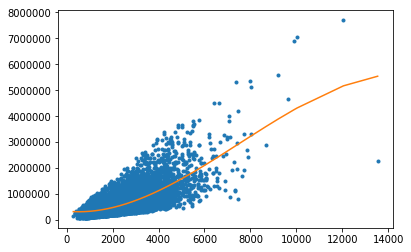

In [17]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',poly3_data['power_1'],lin_reg_model3.predict(poly3_data[['power_1','power_2','power_3']]),'-')

In [18]:
degree = 15
poly15_data = polynomial_pandas(feature,degree)
poly15_data['price'] = sales['price']

In [19]:
x = list()
for i in range(15):
    x.append('power_'+str(i+1))
lin_reg_model15 = lin_reg.fit(X=poly15_data[x],y=poly15_data['price'])

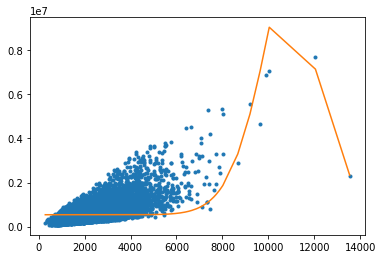

In [20]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',poly15_data['power_1'],lin_reg_model15.predict(poly15_data[x]),'-')

In [38]:
def get_15poly_model (data,degree=15):
    feature = data['sqft_living']
    poly15_data = polynomial_pandas(feature,degree)
    poly15_data['price'] = data['price']
    x = list()
    for i in range(degree):
        x.append('power_'+str(i+1))
    lin_reg_model15 = lin_reg.fit(X=poly15_data[x],y=poly15_data['price'])
    return poly15_data , lin_reg_model15

In [22]:
def plot_fit_line(model15,data_to_plot):
    x= list()
    for i in range(15):
        x.append('power_'+str(i+1))
    plt.plot(data_to_plot['power_1'],data_to_plot['price'],'.',data_to_plot['power_1'],model15.predict(data_to_plot[x]),'-')

In [23]:
set1 = pd.read_csv(r'kc_house_set_1_data.csv.zip',dtype=dtype_dict)
set2 = pd.read_csv(r'kc_house_set_2_data.csv.zip',dtype=dtype_dict)
set3 = pd.read_csv(r'kc_house_set_3_data.csv.zip',dtype=dtype_dict)
set4 = pd.read_csv(r'kc_house_set_4_data.csv.zip',dtype=dtype_dict)
pol15_data,pol15_mod = get_15poly_model(set3)

In [24]:
pol15_mod.coef_

array([ 2.83751934e-88,  1.17220379e-48,  1.95624268e-55,  1.19481893e-58,
        0.00000000e+00,  4.27894986e-69,  2.68009626e-65,  1.63911362e-61,
        9.66435015e-58,  5.38044653e-54,  2.72563636e-50,  1.16253248e-46,
        3.33756141e-43, -6.76238818e-47,  3.43132932e-51])

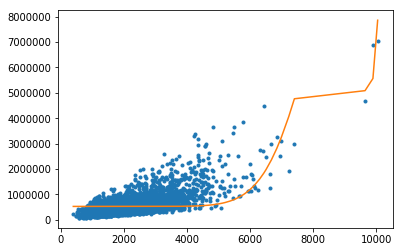

In [25]:
plot_fit_line(pol15_mod,pol15_data)

In [40]:
arr = list()
for deg in range(1,16):
    poly_data ,lin_reg_model = get_15poly_model(data=Train,degree=deg)
    x = list()
    for i in range(1,deg+1):
        x.append('power_'+str(i))
    valid_temp = polynomial_pandas(Valid['sqft_living'],deg)
    valid_temp['price'] = Valid['price']
    pred = lin_reg_model.predict(valid_temp[x])
    rss = (valid_temp['price'] - pred)**2
    rss = sum(rss)
    arr.append(rss)

In [44]:
arr.index(min(arr))

5

In [51]:
arr = list()
for deg in range(1,16):
    poly_data ,lin_reg_model = get_15poly_model(data=Train,degree=deg)
    x = list()
    for i in range(1,deg+1):
        x.append('power_'+str(i))
    test_temp = polynomial_pandas(Test['sqft_living'],deg)
    test_temp['price'] = Test['price']
    pred = lin_reg_model.predict(test_temp[x])
    rss = (test_temp['price'] - pred)**2
    rss = sum(rss)
    arr.append(rss)

In [52]:
arr[5]

135225108328317.11